In [1]:
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import numpy as np

from ClusterInterpretability import ClusterInterpretability

from ucimlrepo import fetch_ucirepo 

from pathlib import Path

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Wine dataset

In [2]:
res_dir = Path.cwd() / "results/cluster/wine"

if not res_dir.exists():
    os.makedirs(res_dir)
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [3]:
# standardize data: we keep only covariates since we are not interested in classification
scaler = StandardScaler()
X = scaler.fit_transform(X)

## K-means

In [4]:
# Fit KMeans
kmeans_wine = KMeans(n_clusters=3, random_state=0).fit(X)
cluster_int_wine_kmeans = ClusterInterpretability(kmeans_wine, X, wine.variables.name.values[1:], kmeans_wine.n_clusters, prefix = "kmeans")

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
Using 178 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 178/178 [05:15<00:00,  1.77s/it]


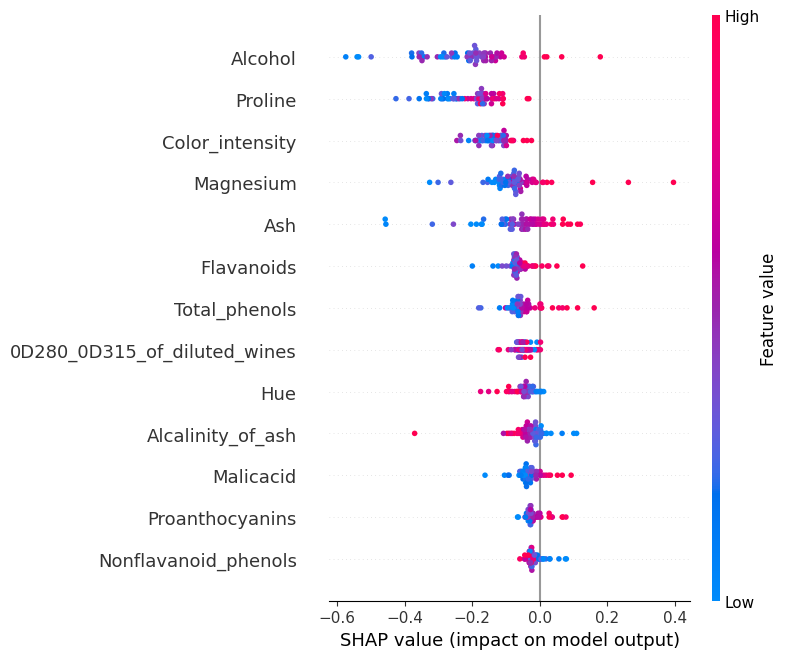

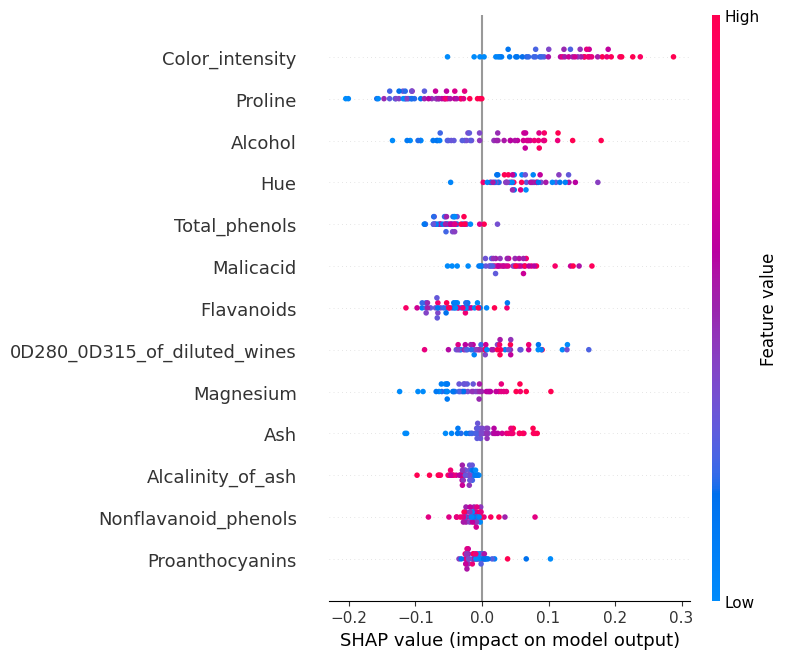

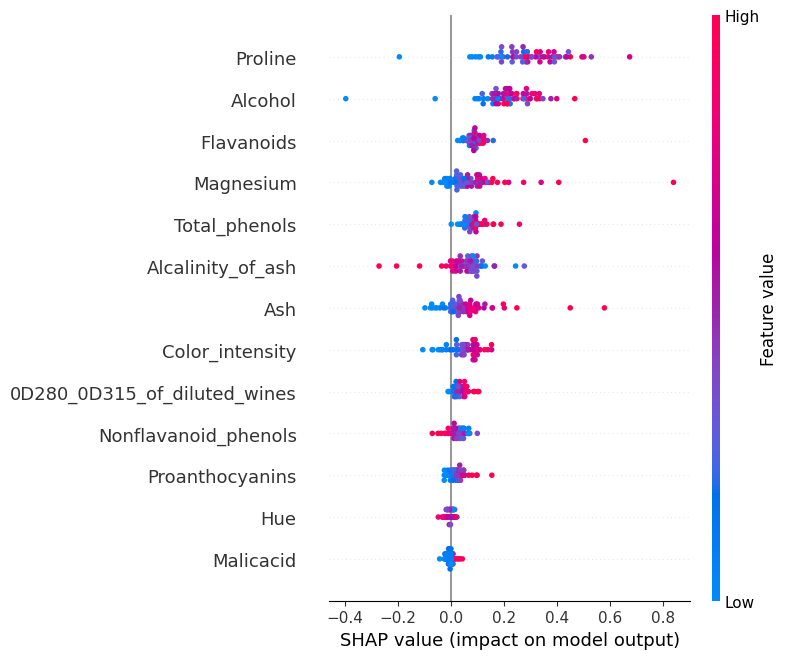

In [5]:
for i in range(kmeans_wine.n_clusters):
    cluster_int_wine_kmeans.plot_explanations(i, res_dir)

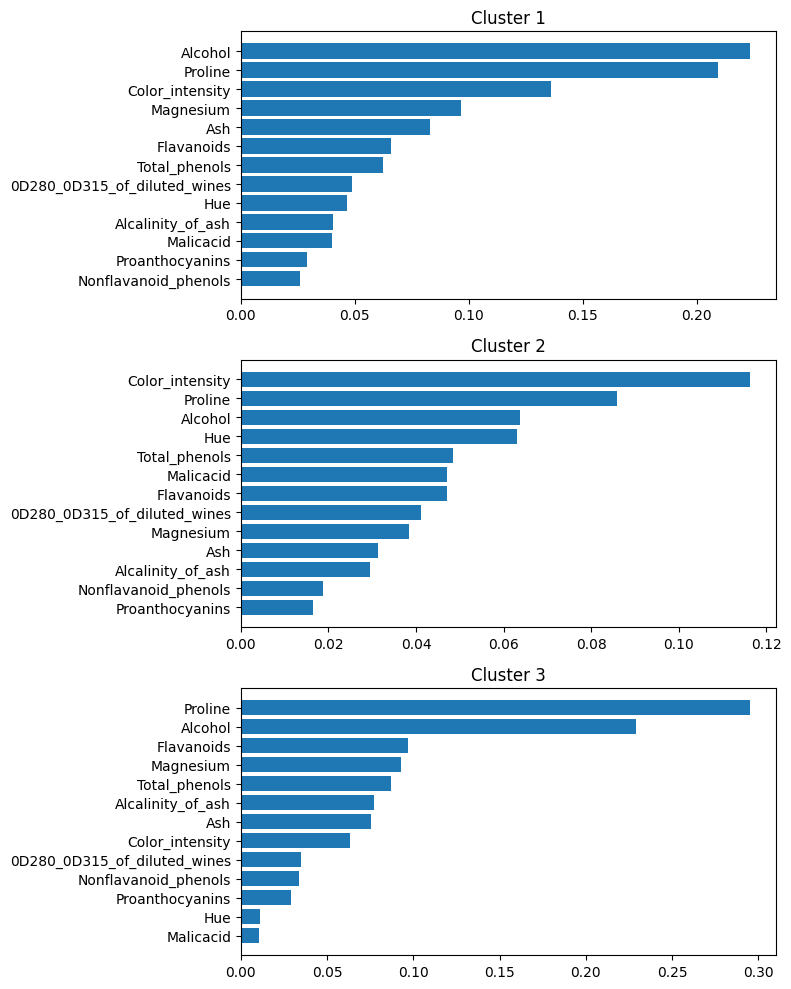

In [6]:
cluster_int_wine_kmeans.plot_global_explanations(nrows=3, res_dir = res_dir, figsize=(8, 10))

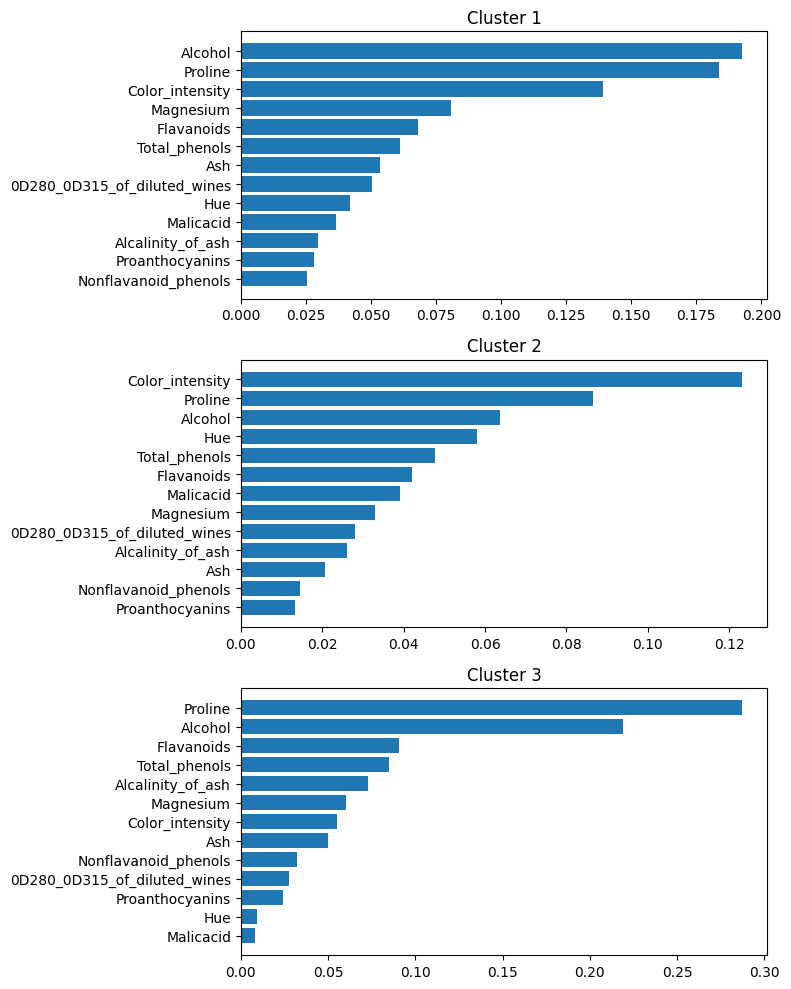

In [7]:
cluster_int_wine_kmeans.plot_global_explanations(nrows=3, res_dir = res_dir, figsize=(8, 10), op=np.median)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


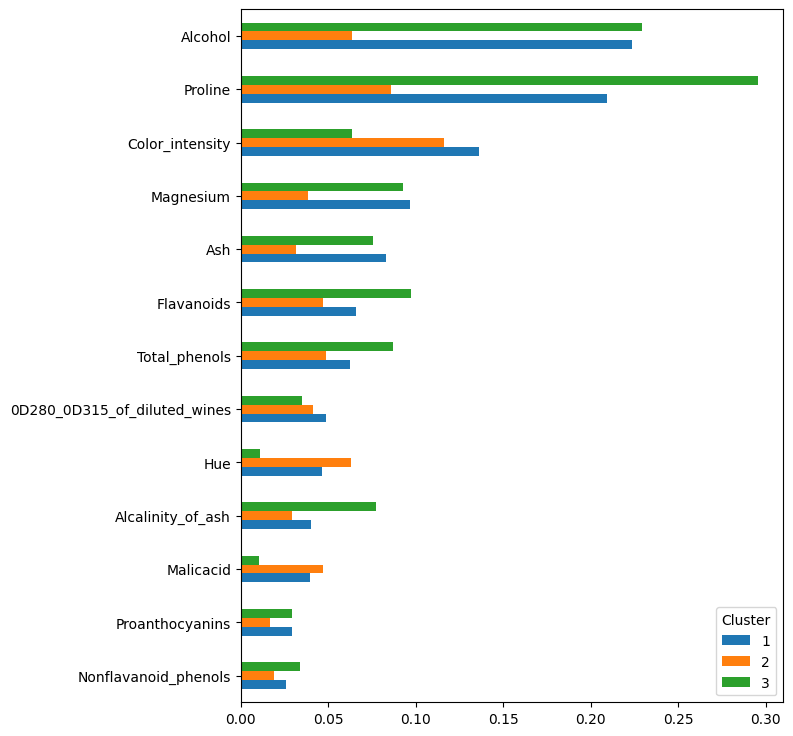

In [11]:
cluster_int_wine_kmeans.plot_global_explanations_grouped(res_dir = res_dir, figsize=(7, 9))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


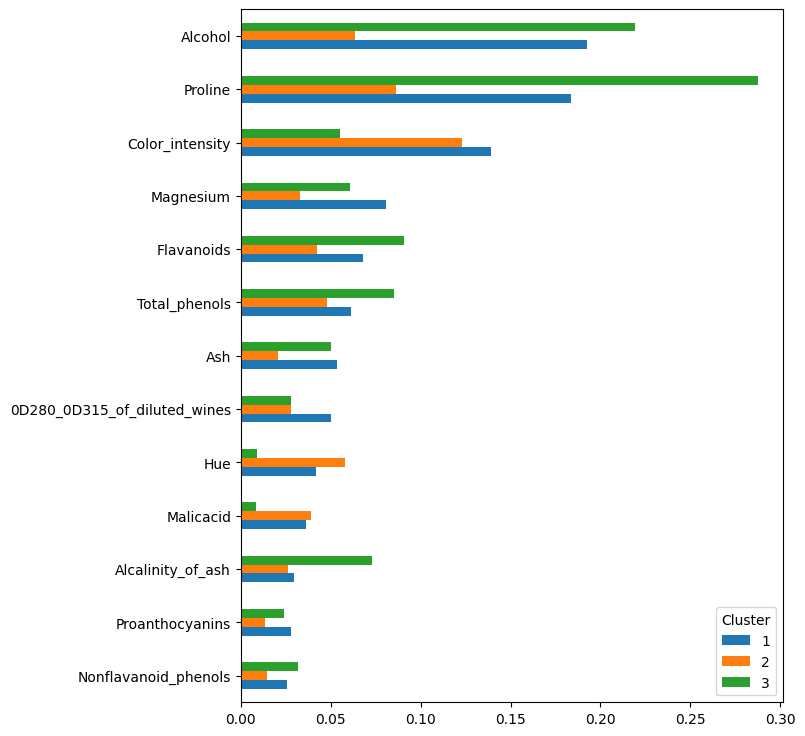

In [12]:
cluster_int_wine_kmeans.plot_global_explanations_grouped(res_dir = res_dir, figsize=(7, 9), op=np.median)

## Gaussian Mixture Models (GMM)

In [13]:
gmm_wine = GaussianMixture(n_components=3, random_state=0).fit(X)
cluster_int_wine_gmm = ClusterInterpretability(gmm_wine, X, wine.variables.name.values[1:], gmm_wine.n_components, prefix="gmm")

Using 178 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/178 [00:00<?, ?it/s]

100%|██████████| 178/178 [05:09<00:00,  1.74s/it]


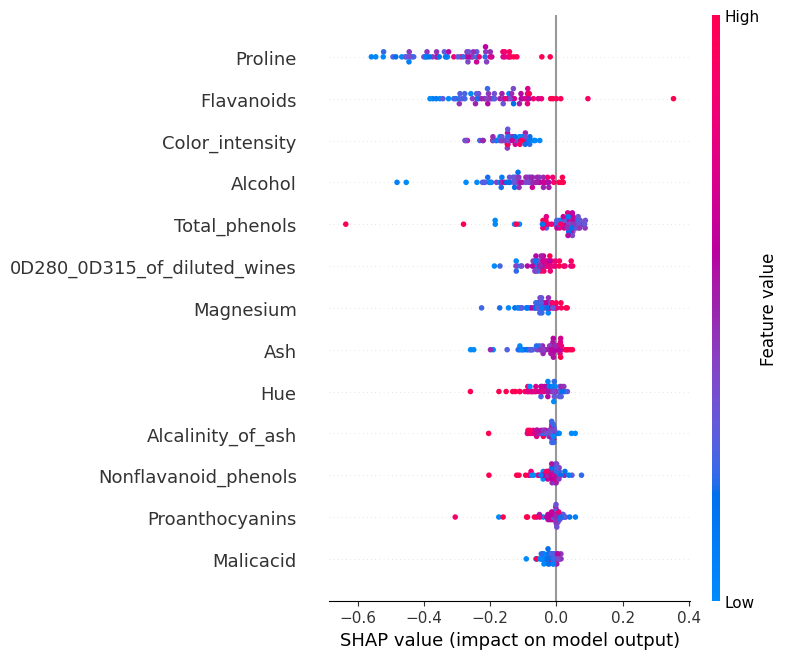

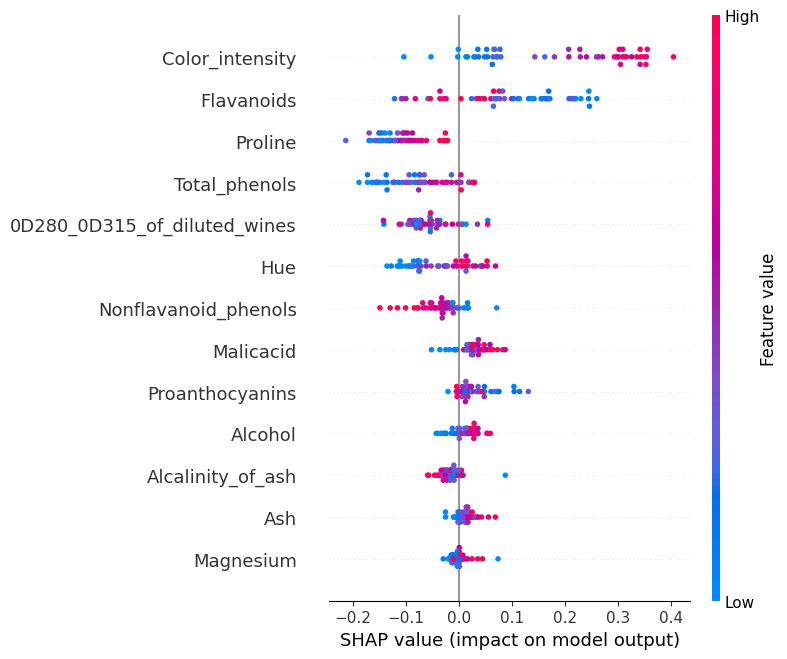

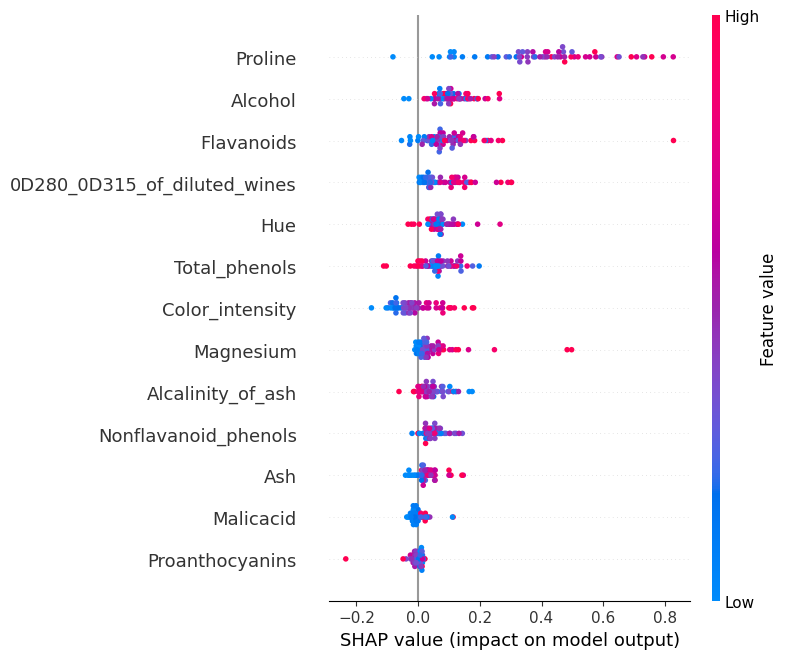

In [14]:
for i in range(gmm_wine.n_components):
    cluster_int_wine_gmm.plot_explanations(i, res_dir)

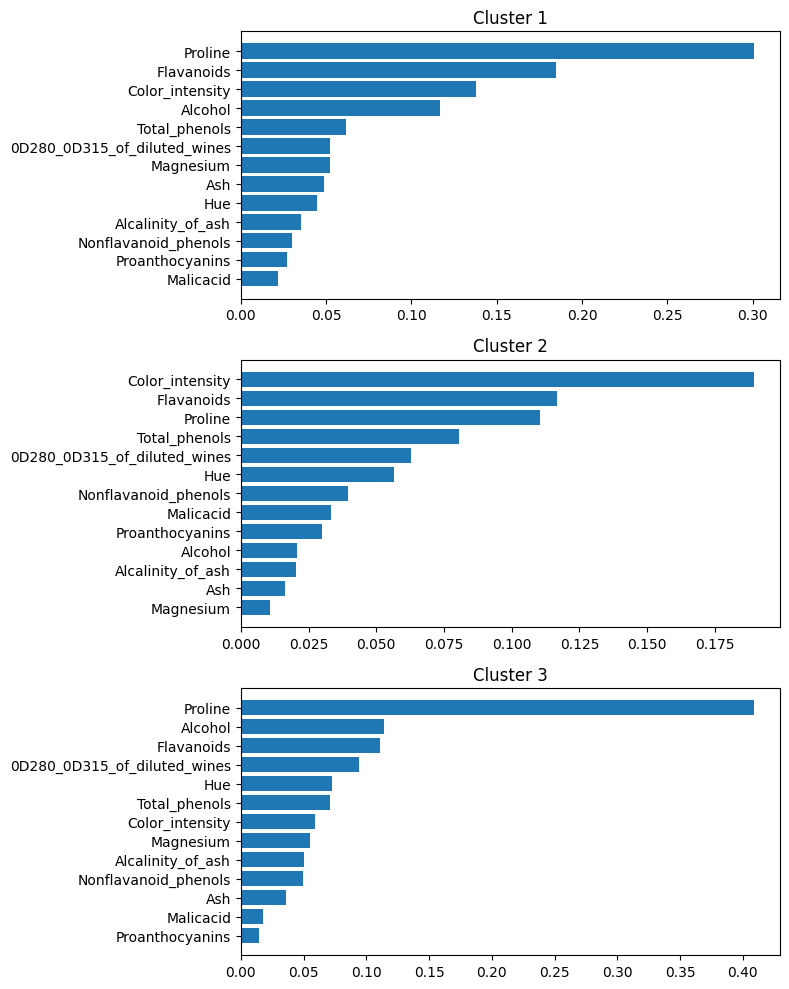

In [15]:
cluster_int_wine_gmm.plot_global_explanations(nrows=3, res_dir = res_dir, figsize=(8, 10))

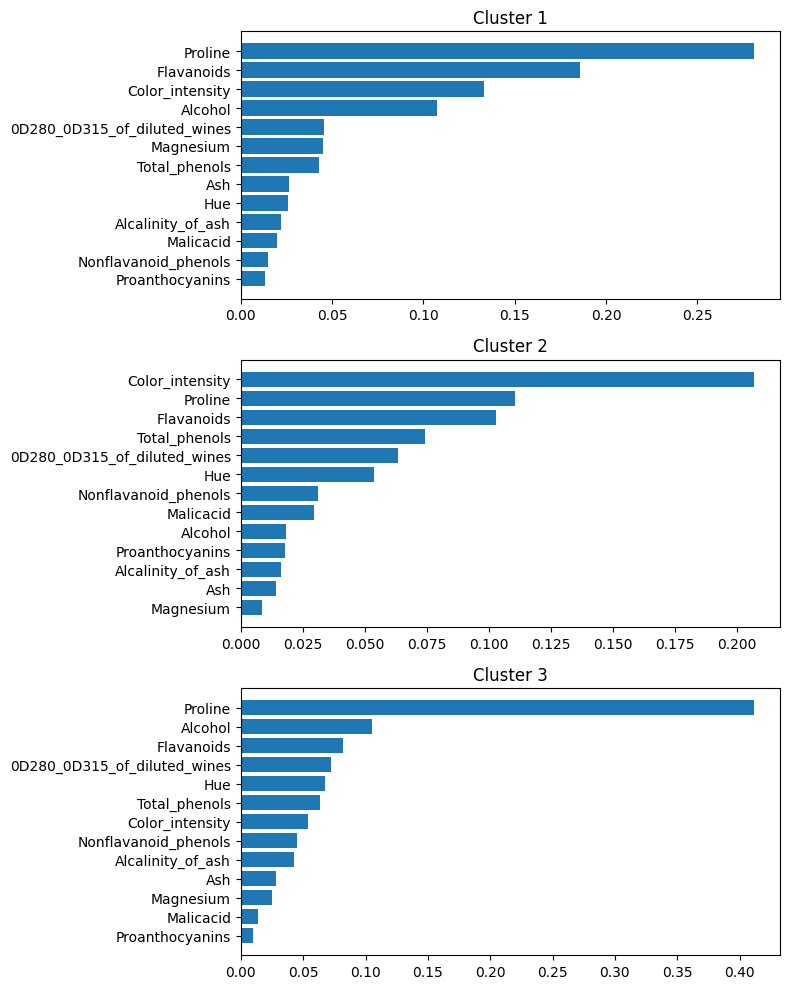

In [16]:
cluster_int_wine_gmm.plot_global_explanations(nrows=3, res_dir = res_dir, figsize=(8, 10), op=np.median)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


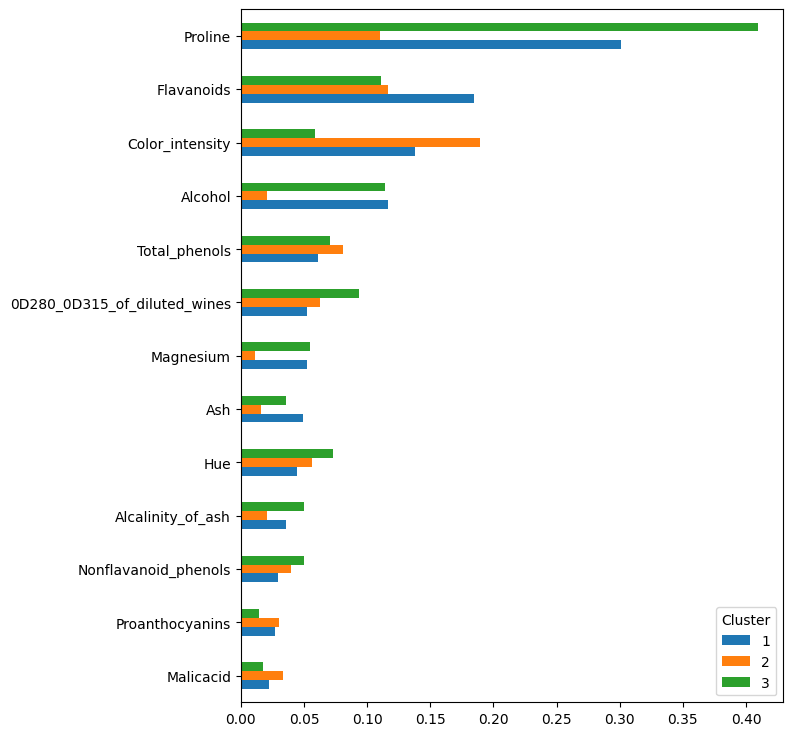

In [19]:
cluster_int_wine_gmm.plot_global_explanations_grouped(res_dir = res_dir, figsize=(7, 9))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


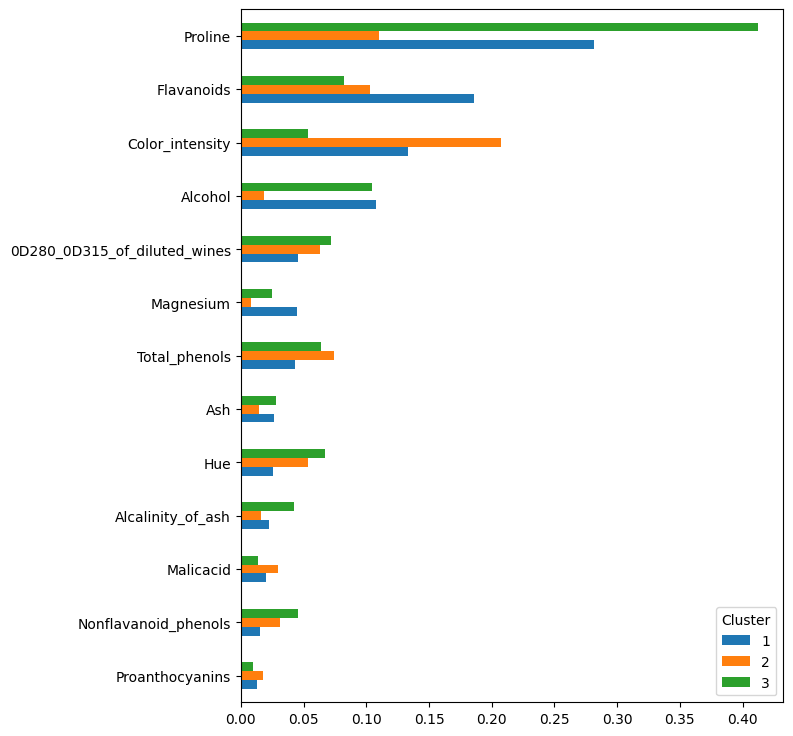

In [17]:
cluster_int_wine_gmm.plot_global_explanations_grouped(res_dir = res_dir, figsize=(7, 9), op=np.median)

# Breast Cancer Wisconsin

In [20]:
res_dir = Path.cwd() / "results/cluster/breast"

if not res_dir.exists():
    os.makedirs(res_dir)

# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features
# remove missing values
X = X.dropna()
y = breast_cancer_wisconsin_original.data.targets 

In [21]:
# standardize data: we keep only covariates since we are not interested in classification
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
# Sample 30% of the data
np.random.seed(0)
sample = np.random.choice(X.shape[0], int(X.shape[0] * 0.3), replace=False)
X = X[sample, :]

## K-means

In [24]:
# Fit KMeans
kmeans_means = KMeans(n_clusters=2, random_state=0).fit(X)
cluster_int_breast_kmeans = ClusterInterpretability(kmeans_means, X, breast_cancer_wisconsin_original.variables.name.values[:-1], kmeans_means.n_clusters, prefix="kmeans")

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
Using 204 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/204 [00:00<?, ?it/s]

100%|██████████| 204/204 [01:24<00:00,  2.41it/s]


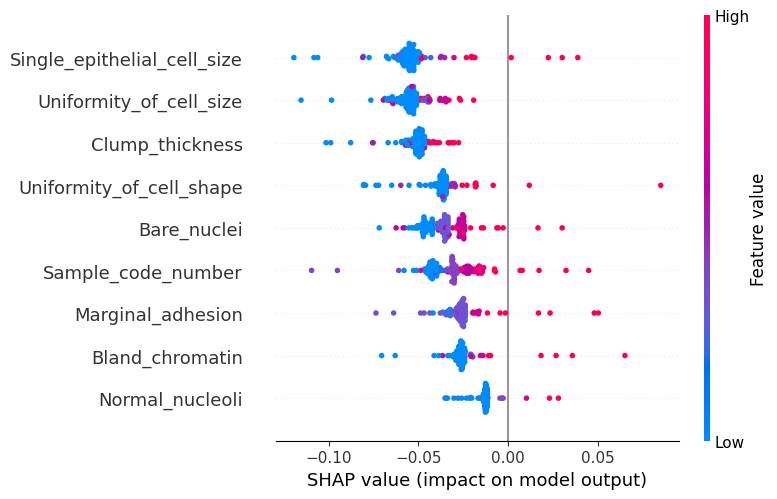

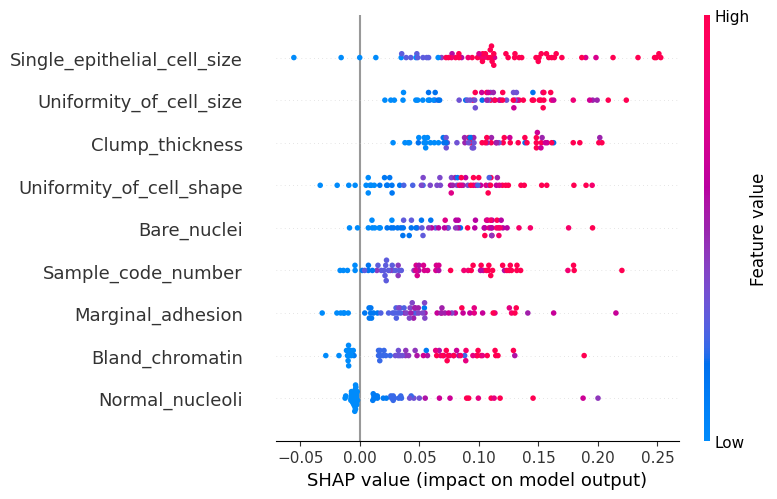

In [25]:
for i in range(kmeans_means.n_clusters):
    cluster_int_breast_kmeans.plot_explanations(i, res_dir)

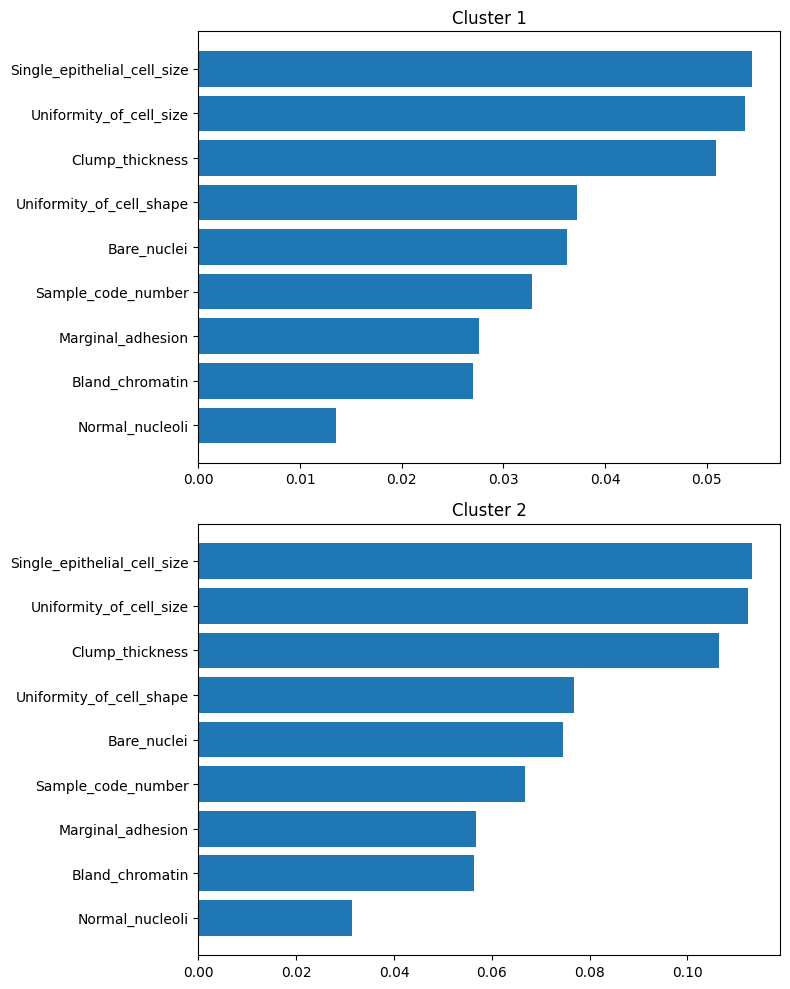

In [26]:
cluster_int_breast_kmeans.plot_global_explanations(res_dir = res_dir, nrows=2, figsize=(8, 10))

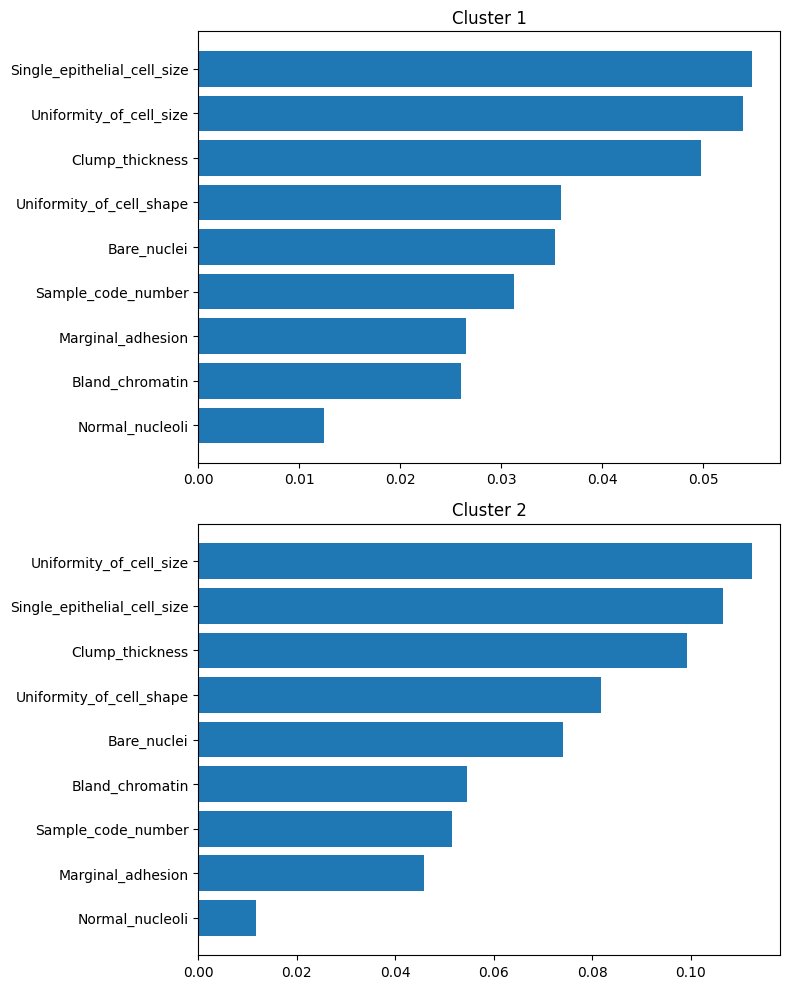

In [27]:
cluster_int_breast_kmeans.plot_global_explanations(op = np.median, res_dir = res_dir, nrows=2, figsize=(8, 10))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


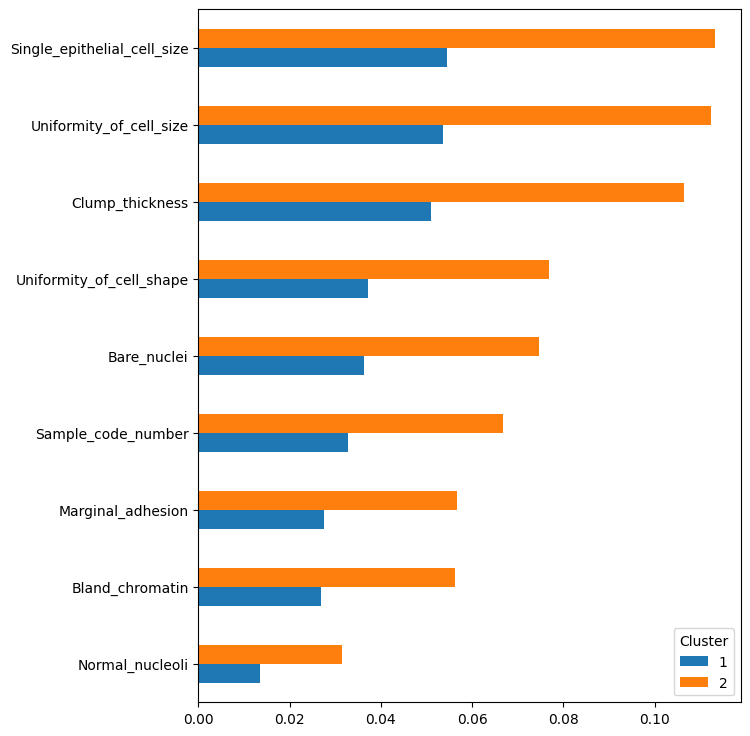

In [29]:
cluster_int_breast_kmeans.plot_global_explanations_grouped(res_dir = res_dir, figsize=(7, 9))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


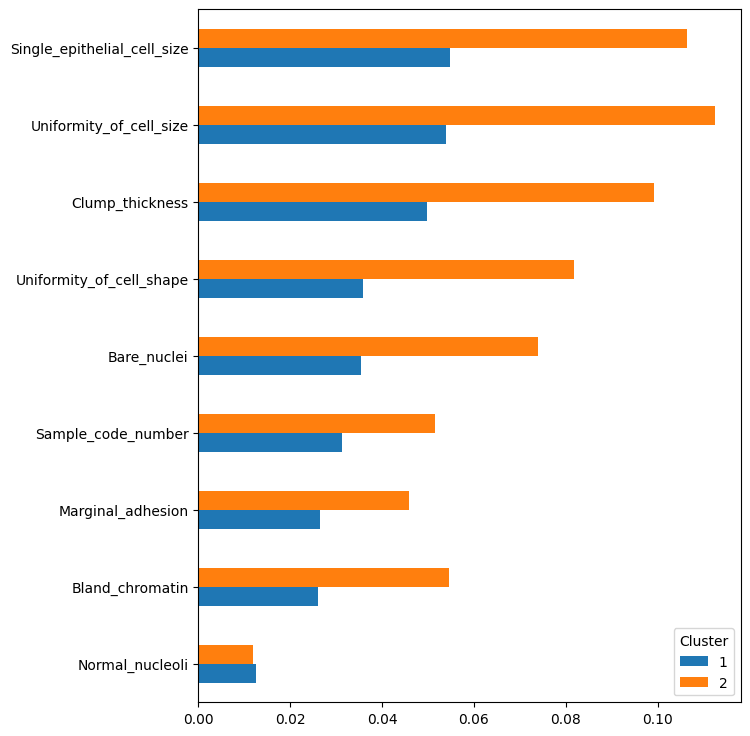

In [28]:
cluster_int_breast_kmeans.plot_global_explanations_grouped(res_dir = res_dir, figsize=(7, 9), op=np.median)

## Gaussian Mixture Models (GMM)

In [30]:
gmm_breast = GaussianMixture(n_components=2, random_state=0).fit(X)
cluster_int_breast_gmm = ClusterInterpretability(gmm_breast, X, breast_cancer_wisconsin_original.variables.name.values[:-1], gmm_breast.n_components, prefix="gmm")

Using 204 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/204 [00:00<?, ?it/s]

100%|██████████| 204/204 [01:45<00:00,  1.93it/s]


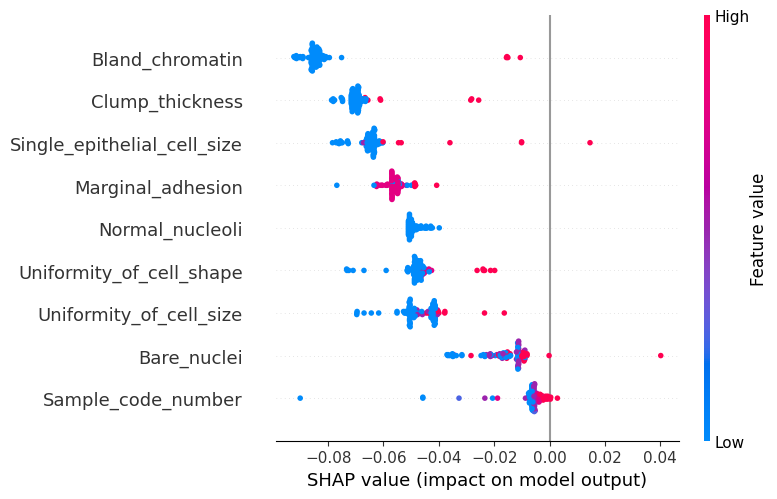

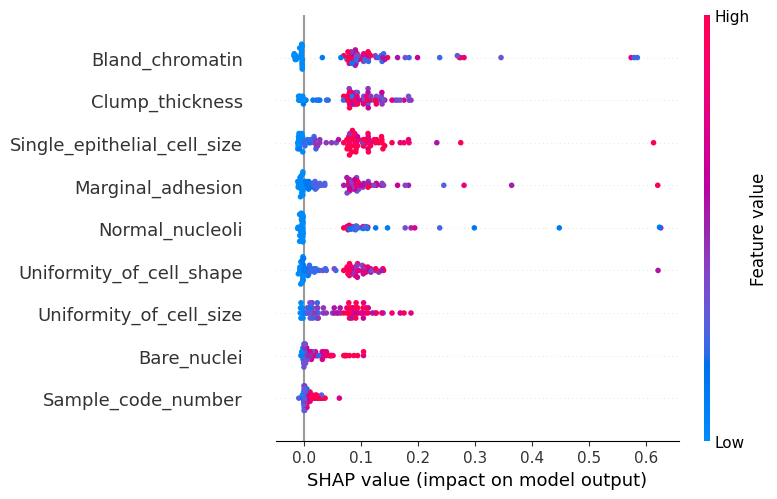

In [31]:
for i in range(gmm_breast.n_components):
    cluster_int_breast_gmm.plot_explanations(i, res_dir)

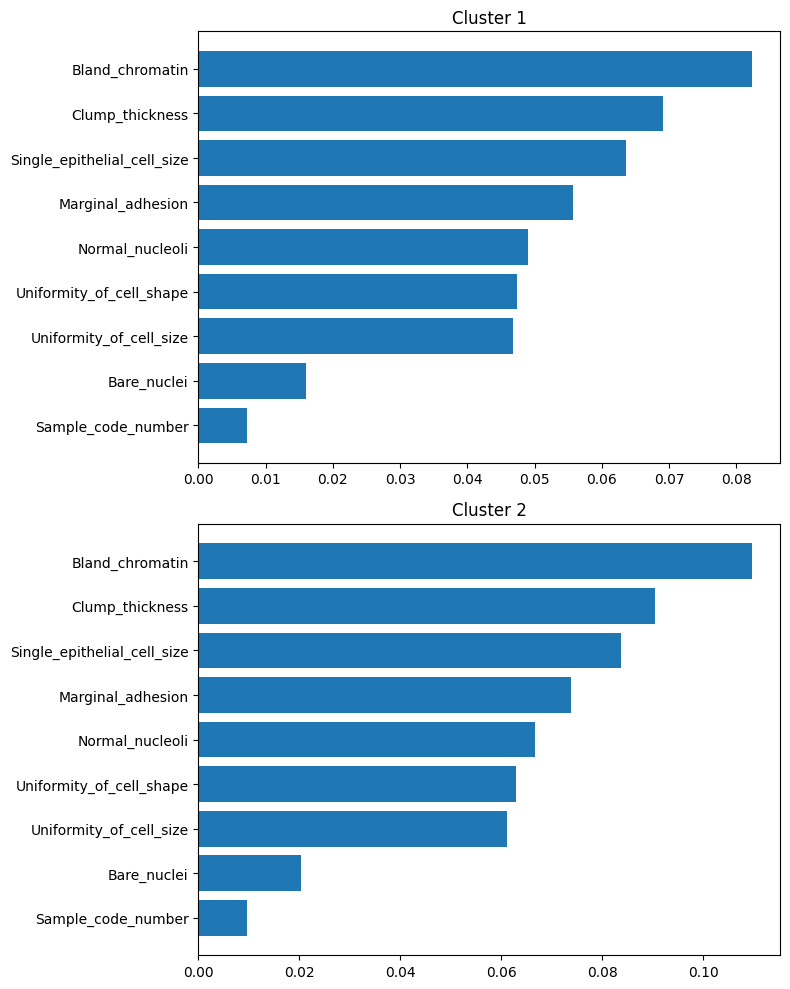

In [32]:
cluster_int_breast_gmm.plot_global_explanations(res_dir = res_dir, nrows=2, figsize=(8, 10))

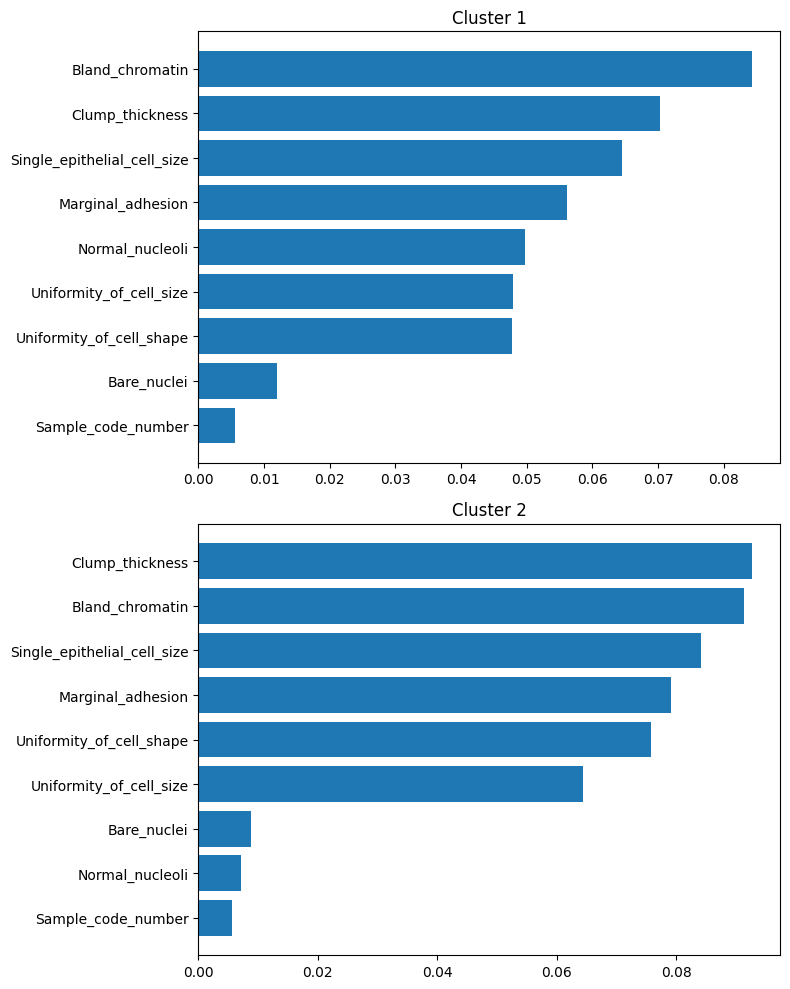

In [33]:
cluster_int_breast_gmm.plot_global_explanations(op = np.median, res_dir = res_dir, nrows=2, figsize=(8, 10))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


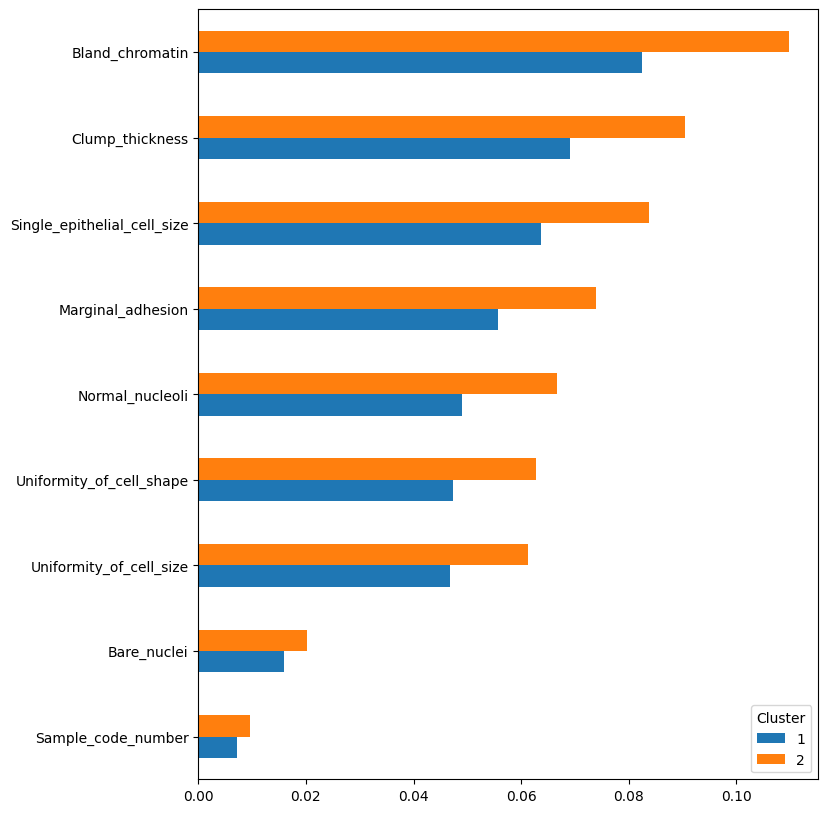

In [36]:
cluster_int_breast_gmm.plot_global_explanations_grouped(res_dir = res_dir, figsize=(8, 10))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


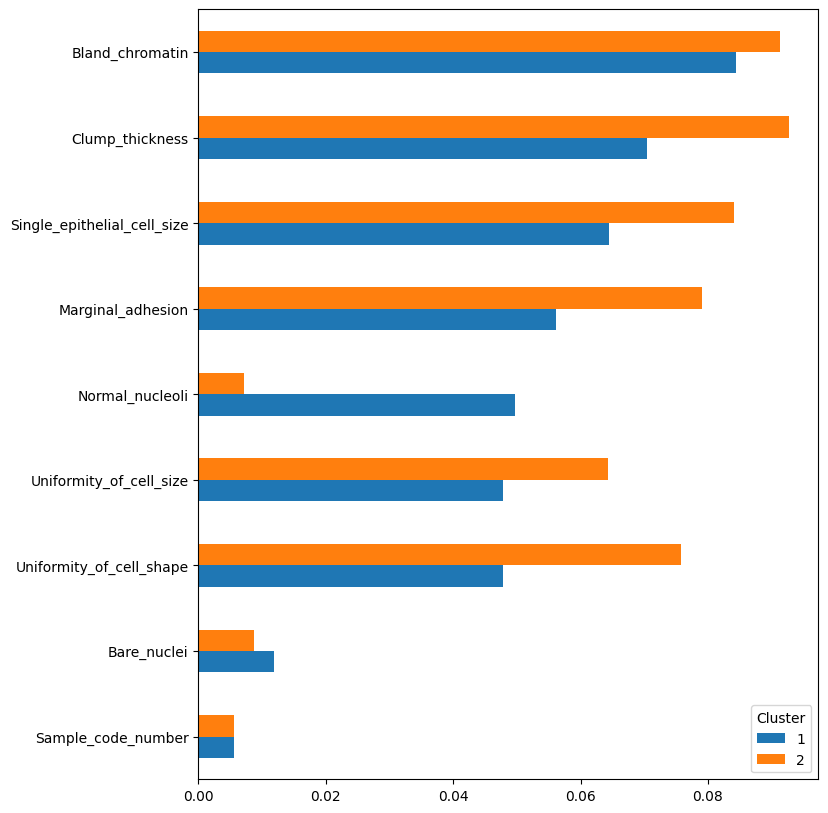

In [35]:
cluster_int_breast_gmm.plot_global_explanations_grouped(res_dir = res_dir, figsize=(8, 10), op=np.median)